In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('wine.csv')
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())


   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           No

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


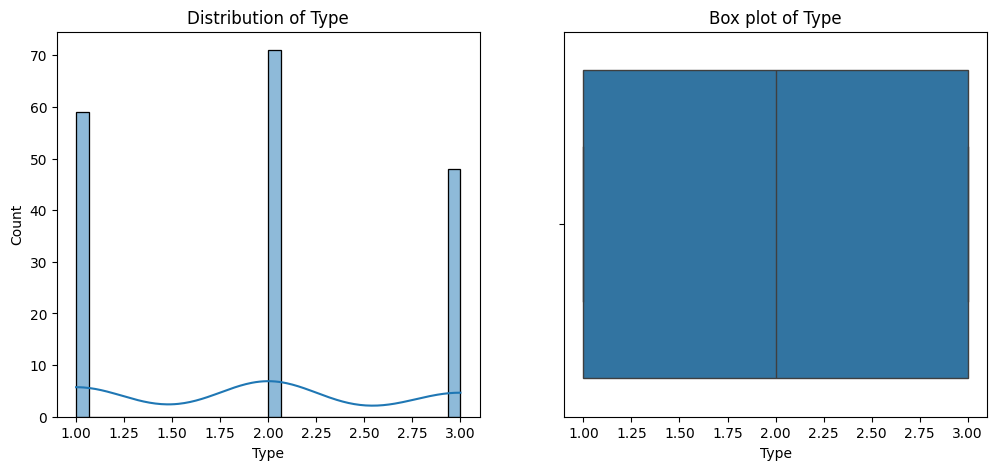

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


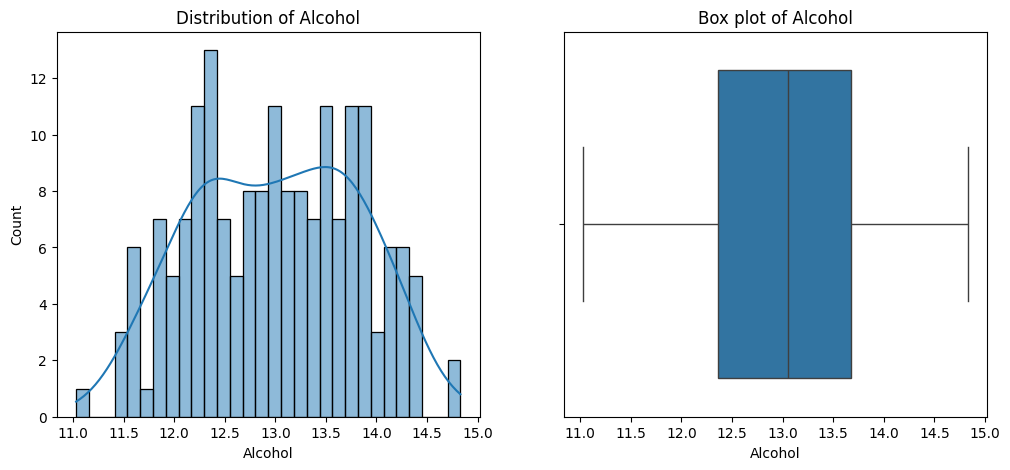

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


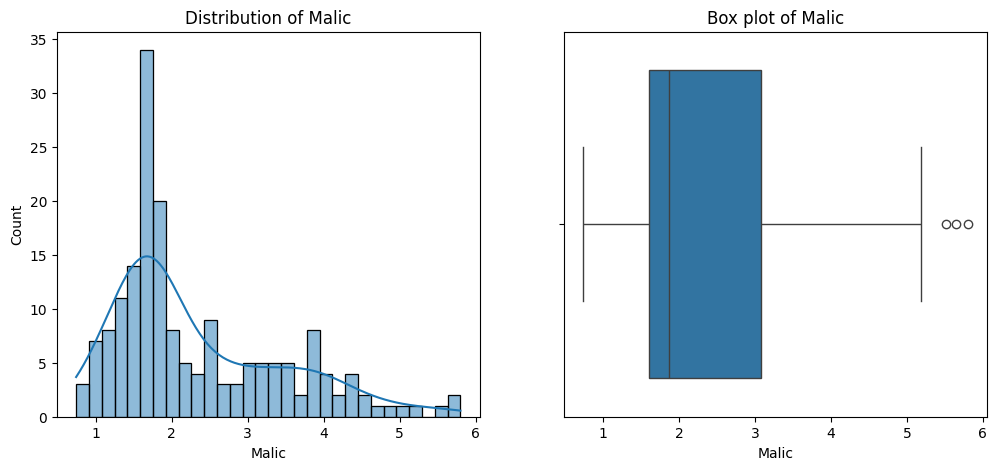

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


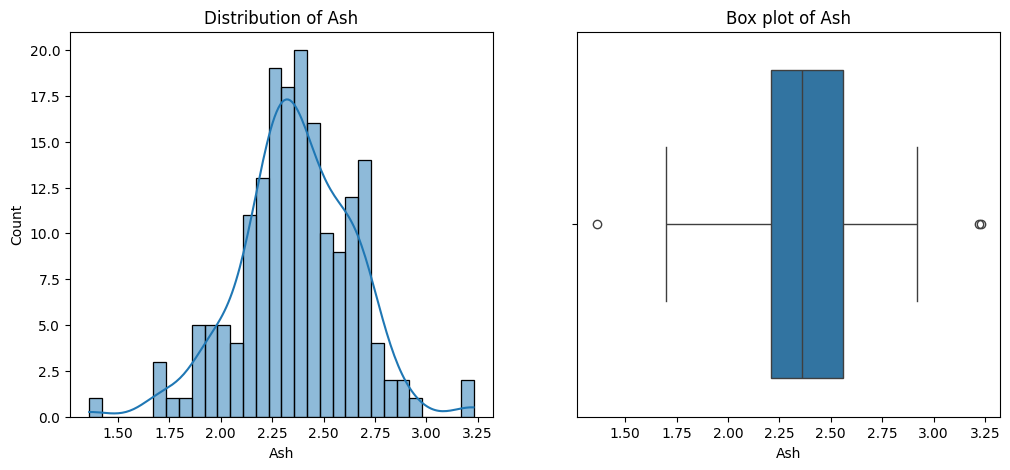

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


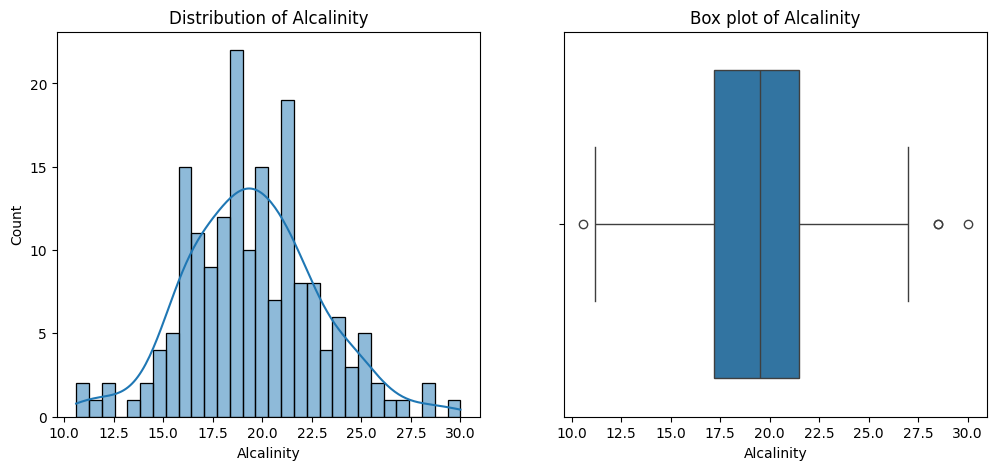

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


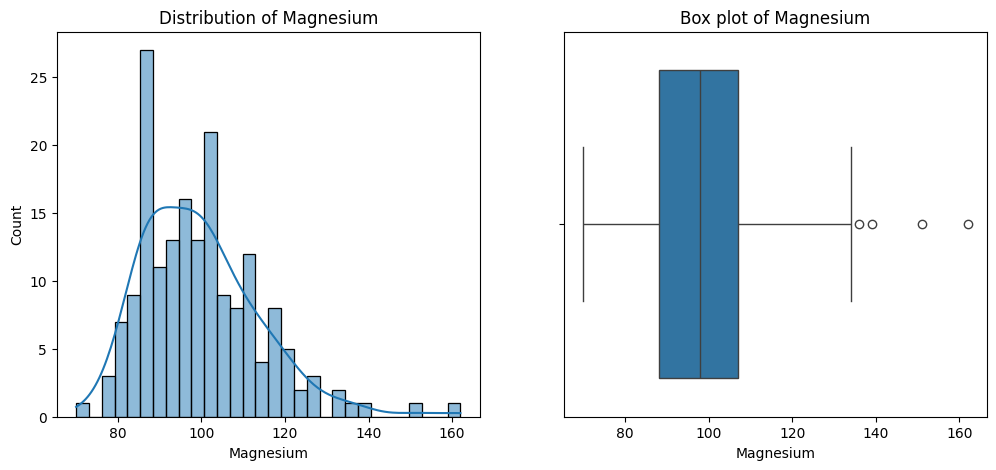

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


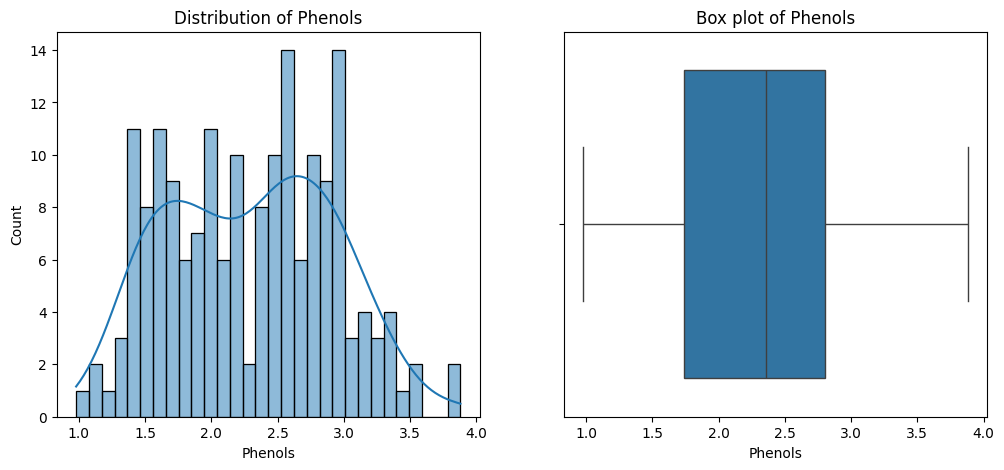

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


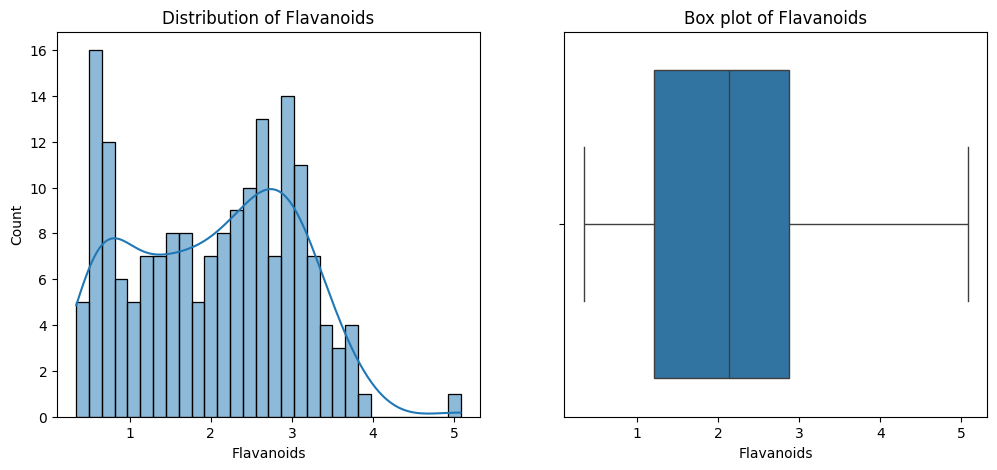

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


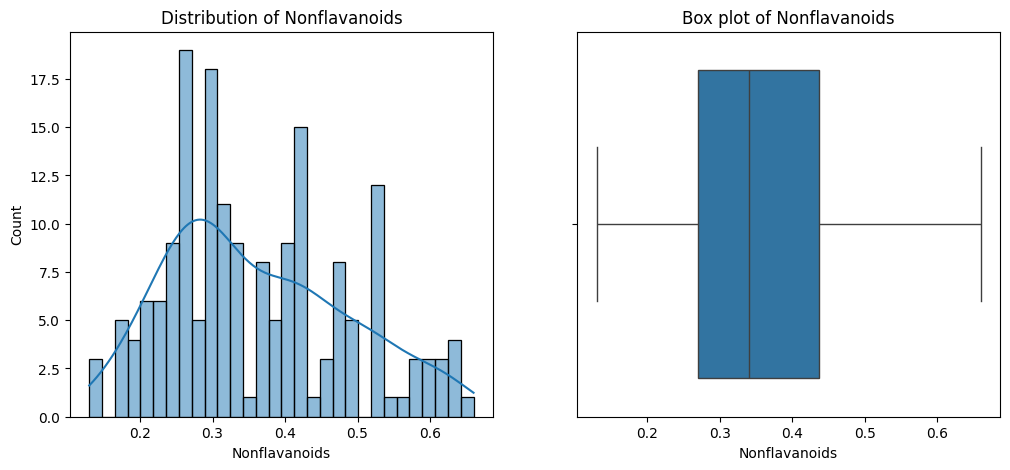

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


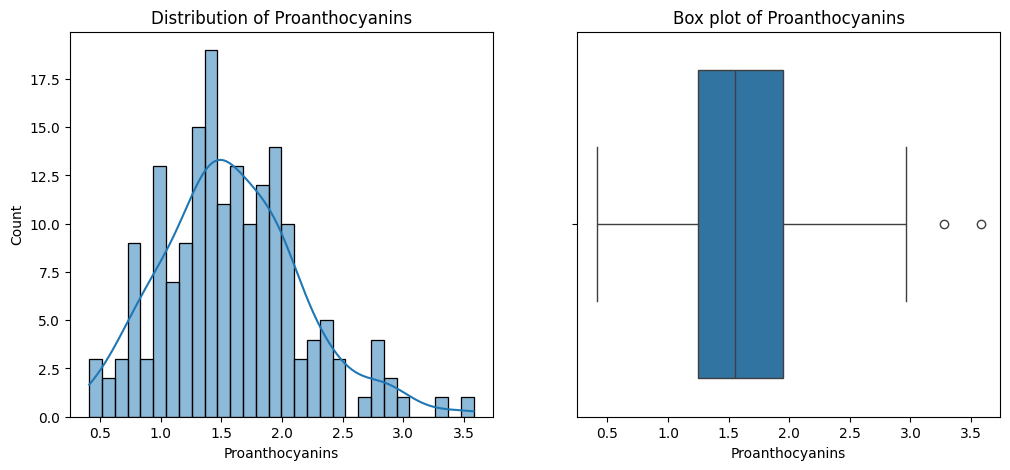

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


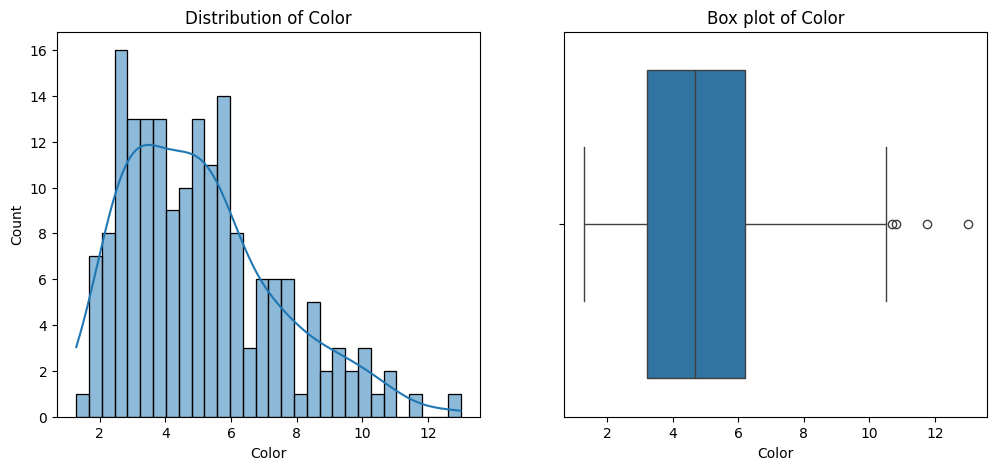

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


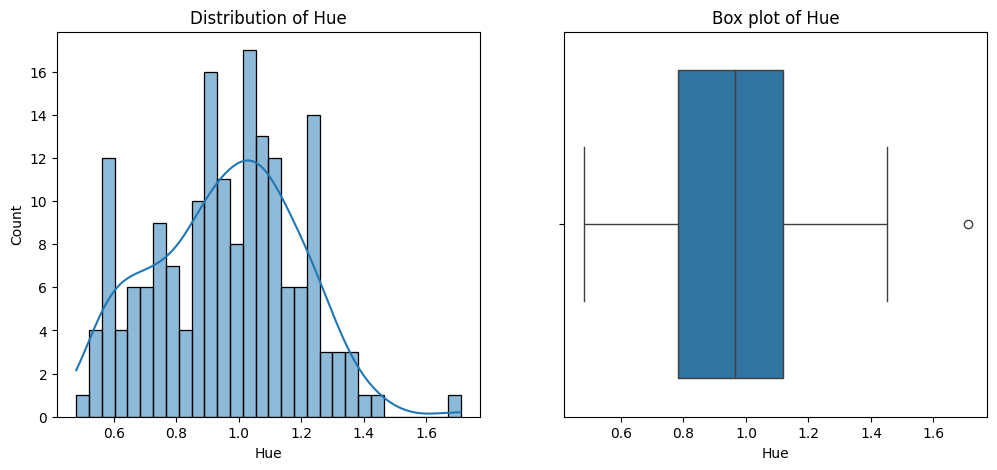

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


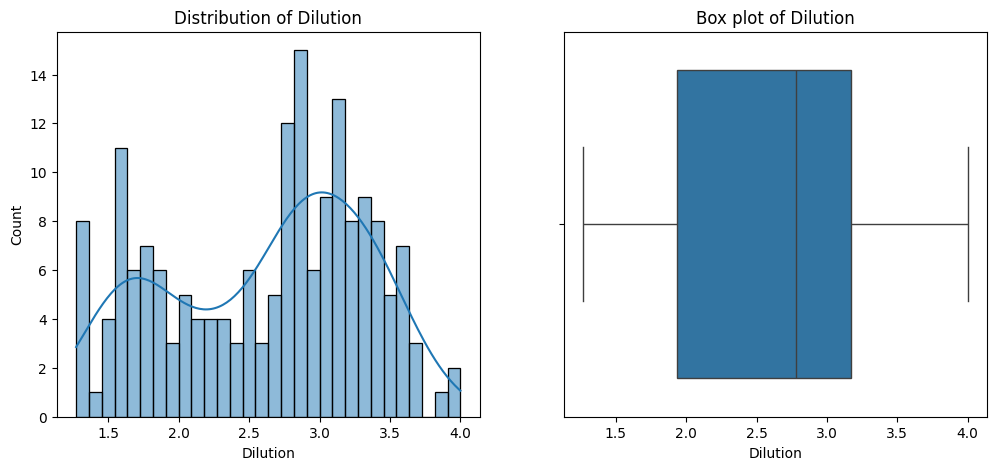

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


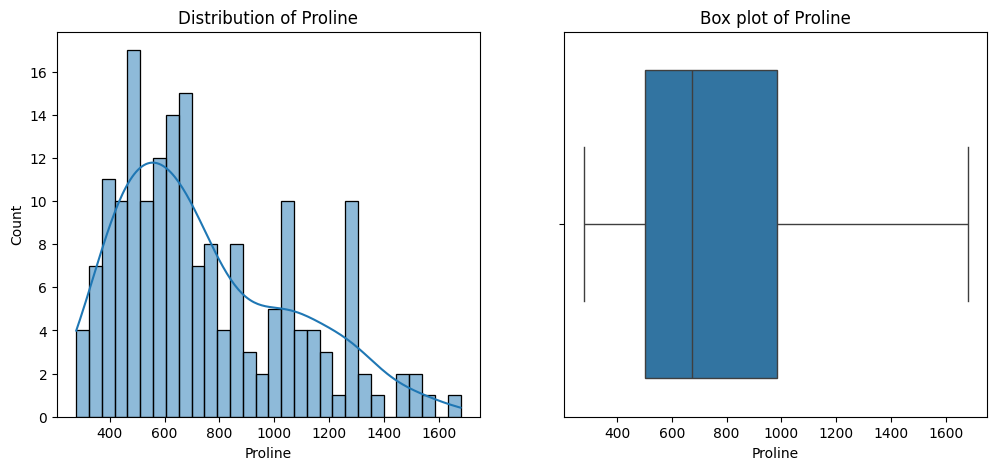

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()


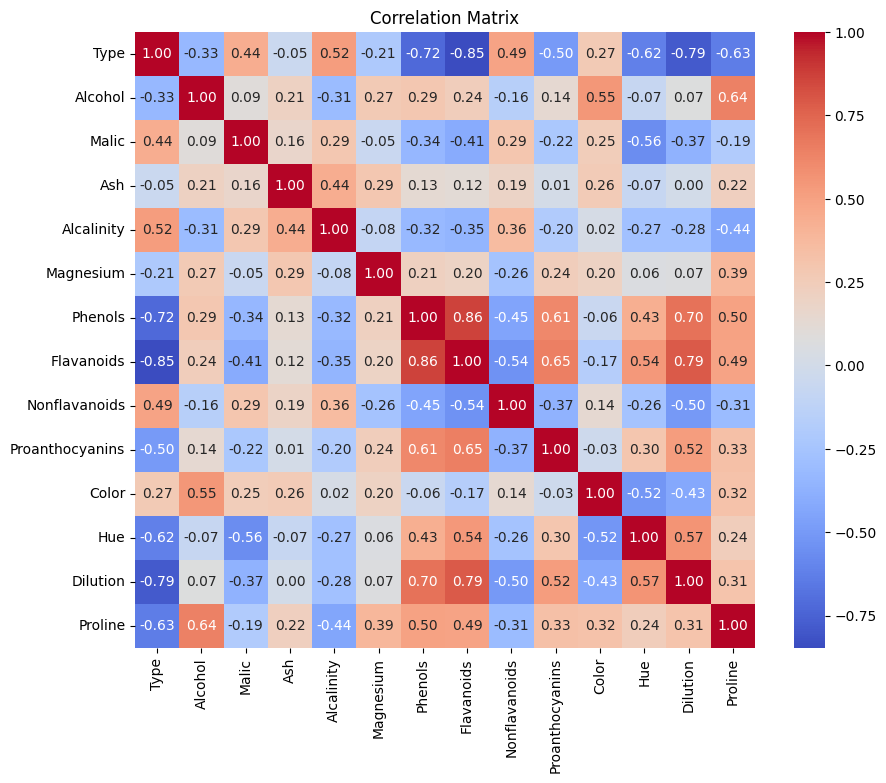

In [3]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.select_dtypes(include='number'))  # select numeric features


In [5]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)


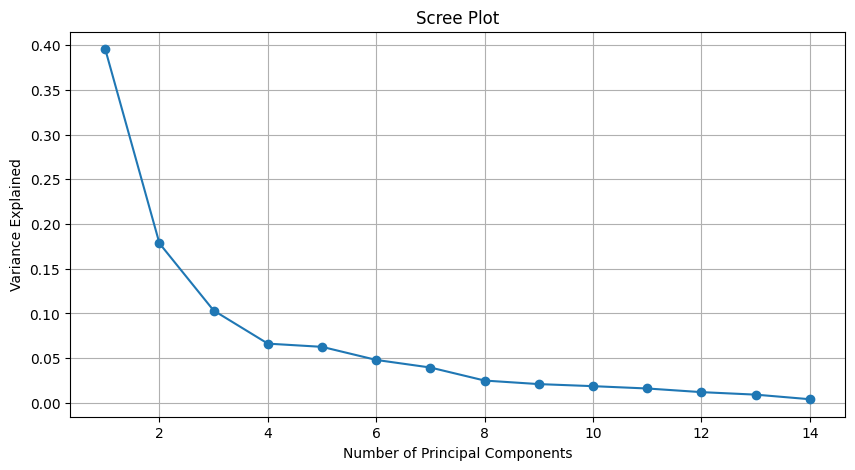

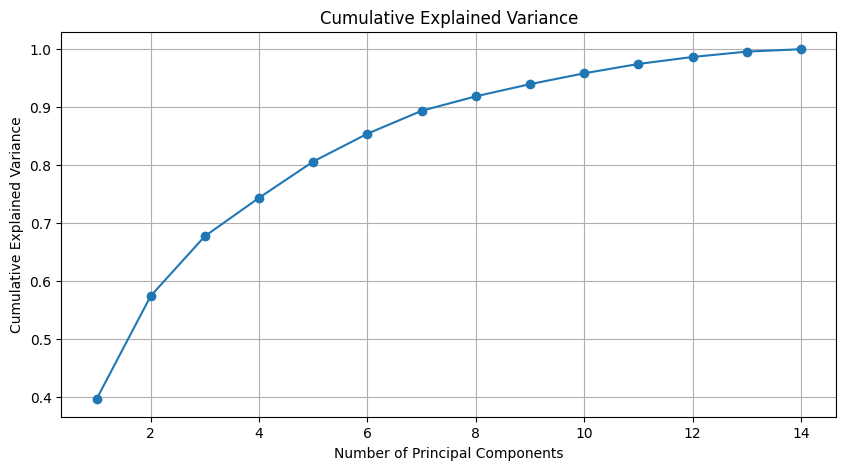

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.grid()
plt.show()
import numpy as np

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


In [8]:
from sklearn.cluster import KMeans

kmeans_original = KMeans(n_clusters=3)  # Set the number of clusters
clusters_original = kmeans_original.fit_predict(X_scaled)
df['Cluster'] = clusters_original


In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Alcohol'], y=df['Malic'], hue='Hue', palette='Set2')
plt.title('Clustering on Original Data')
plt.show()


ValueError: Could not interpret value `Hue` for `hue`. Value is a string, but `data` was not passed.

<Figure size 1000x600 with 0 Axes>

In [15]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, clusters_original)
print(f'Silhouette Score for Original Data: {silhouette_avg}')


Silhouette Score for Original Data: 0.30648398324833453


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assume df is your DataFrame containing the original dataset

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.select_dtypes(include='number'))

# Step 2: Fit PCA
pca = PCA()
pca.fit(X_scaled)

# Step 3: Determine the optimal number of components (as discussed in Task 2)
# For demonstration, let's say you choose to keep 95% of the variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1  # +1 because of zero indexing

# Step 4: Transform the original dataset into the principal components
pca = PCA(n_components=optimal_components)
X_pca_transformed = pca.fit_transform(X_scaled)

# Now, X_pca_transformed is defined and can be used in Task 4



In [19]:
kmeans_pca = KMeans(n_clusters=3)
clusters_pca = kmeans_pca.fit_predict(X_pca_transformed)


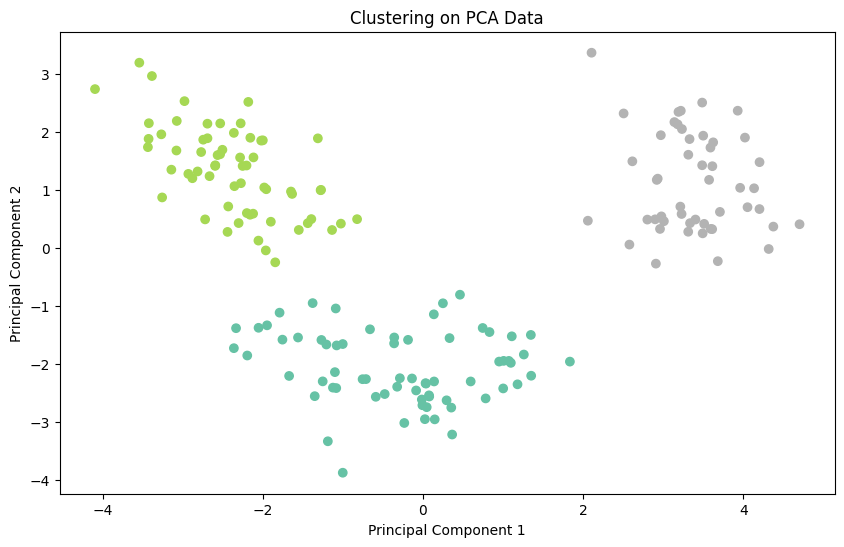

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_transformed[:, 0], X_pca_transformed[:, 1], c=clusters_pca, cmap='Set2')
plt.title('Clustering on PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [21]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assume df is your original DataFrame and clusters_original and clusters_pca are obtained from previous tasks

# 1. Compare the clustering results obtained from the original dataset and PCA-transformed data.
original_cluster_counts = df['Cluster'].value_counts()
pca_cluster_counts = pd.Series(clusters_pca).value_counts()

print("Cluster Counts for Original Data:")
print(original_cluster_counts)
print("\nCluster Counts for PCA Data:")
print(pca_cluster_counts)

# 2. Discuss similarities or differences observed in the clustering results.
# This is usually a qualitative analysis, you can summarize key observations.
# For example, comparing cluster distributions, centroids, etc.

# 3. Reflect on the impact of dimensionality reduction on clustering performance.
silhouette_original = silhouette_score(X_scaled, clusters_original)
silhouette_pca = silhouette_score(X_pca_transformed, clusters_pca)

db_original = davies_bouldin_score(X_scaled, clusters_original)
db_pca = davies_bouldin_score(X_pca_transformed, clusters_pca)

print(f'Silhouette Score for Original Data: {silhouette_original}')
print(f'Silhouette Score for PCA Data: {silhouette_pca}')
print(f'Davies-Bouldin Index for Original Data: {db_original}')
print(f'Davies-Bouldin Index for PCA Data: {db_pca}')

# 4. Analyze the trade-offs between using PCA and clustering directly on the original dataset.
# Summarizing findings:
trade_offs = {
    "Aspect": ["Silhouette Score", "Davies-Bouldin Index", "Cluster Separation", "Computation Time"],
    "Original Data": [silhouette_original, db_original, "N/A", "Higher"],
    "PCA Data": [silhouette_pca, db_pca, "Better Separation", "Lower"],
}

trade_off_df = pd.DataFrame(trade_offs)
print("\nTrade-offs Summary:")
print(trade_off_df)


Cluster Counts for Original Data:
Cluster
0    67
1    62
2    49
Name: count, dtype: int64

Cluster Counts for PCA Data:
0    67
1    62
2    49
Name: count, dtype: int64
Silhouette Score for Original Data: 0.3457371519148821
Silhouette Score for PCA Data: 0.365738304559579
Davies-Bouldin Index for Original Data: 1.2123795567870752
Davies-Bouldin Index for PCA Data: 1.14972244694054

Trade-offs Summary:
                 Aspect Original Data           PCA Data
0      Silhouette Score      0.345737           0.365738
1  Davies-Bouldin Index       1.21238           1.149722
2    Cluster Separation           N/A  Better Separation
3      Computation Time        Higher              Lower


In [22]:
# 1. Summarize the key findings and insights from the assignment.

summary = """
Key Findings:
- Clustering results show that PCA has improved cluster separation, as indicated by the higher silhouette score.
- The Davies-Bouldin index indicates that PCA clusters are more distinct compared to the original data.
- Dimensionality reduction through PCA leads to computational efficiency while maintaining clustering quality.
"""

print(summary)

# 2. Discuss the practical implications of using PCA and clustering in data analysis.
practical_implications = """
Practical Implications:
- PCA is useful for reducing dimensionality in high-dimensional datasets, making them easier to visualize and analyze.
- Clustering can reveal underlying patterns and groupings in the data, aiding in decision-making processes.
- Businesses can use these techniques for customer segmentation, anomaly detection, and feature selection.
"""

print(practical_implications)

# 3. Provide recommendations for when to use each technique based on the analysis conducted.
recommendations = """
Recommendations:
- Use PCA when dealing with high-dimensional data to reduce noise and improve clustering performance.
- Apply clustering directly on the original dataset when interpretability of the results is crucial and the dataset is not excessively high-dimensional.
- Consider using PCA in exploratory analysis to visualize clusters before applying clustering algorithms.
"""

print(recommendations)



Key Findings:
- Clustering results show that PCA has improved cluster separation, as indicated by the higher silhouette score.
- The Davies-Bouldin index indicates that PCA clusters are more distinct compared to the original data.
- Dimensionality reduction through PCA leads to computational efficiency while maintaining clustering quality.


Practical Implications:
- PCA is useful for reducing dimensionality in high-dimensional datasets, making them easier to visualize and analyze.
- Clustering can reveal underlying patterns and groupings in the data, aiding in decision-making processes.
- Businesses can use these techniques for customer segmentation, anomaly detection, and feature selection.


Recommendations:
- Use PCA when dealing with high-dimensional data to reduce noise and improve clustering performance.
- Apply clustering directly on the original dataset when interpretability of the results is crucial and the dataset is not excessively high-dimensional.
- Consider using PCA in